# PSET0 - Writing Good Functions

For this problem set there are three parts, each worth 33% of your grade. You will be graded based on:

- Correct completion of the task.
- Your code is readable.
- Your functions are named well.

## Part 1 - Animated Plotly Chart

The code below generates an animated Plotly chart using data from the Gapminder foundation. Your task is to create a function that will set a maximum and minimum year for the animation slider. The function should return the completed animation.

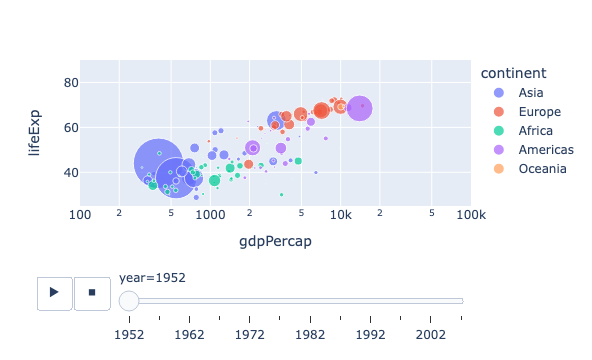

In [2]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

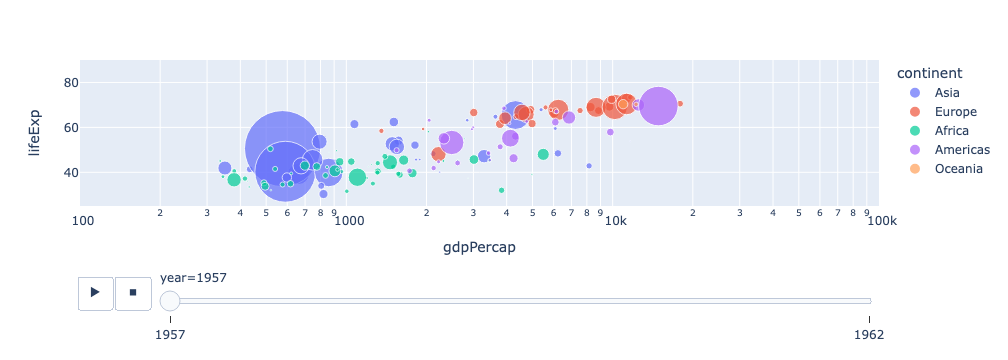

In [3]:
plotter(df, 1957, 1965)

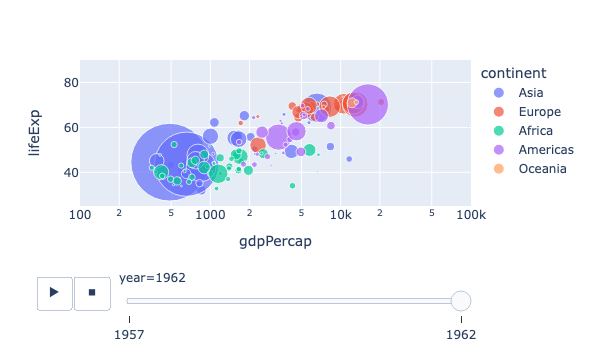

In [5]:
import plotly.express as px

def plotter(df, min_year, max_year):
    # Filter the DataFrame to include only data within the specified year range
    filtered_df = df[(df['year'] >= min_year) & (df['year'] <= max_year)]

    # Create an animated Plotly chart
    fig = px.scatter(
        filtered_df,
        x="gdpPercap",
        y="lifeExp",
        animation_frame="year",
        animation_group="country",
        size="pop",
        color="continent",
        hover_name="country",
        log_x=True,
        size_max=55,
        range_x=[100, 100000],
        range_y=[25, 90]
    )

    return fig

# Example usage:
if __name__ == "__main__":
    df = px.data.gapminder()
    animation_fig = plotter(df, 1957, 1965)
    animation_fig.show()


## Part 2 - Perform Scikit-Learn Inference

Your task is to create a function that will perform inference using a pickled Scikit-Learn model. The model was trained on the famous Iris dataset. It takes 4 features: sepal length, sepal width, petal length, and petal width. 

Your task is to create a function that will take the 4 features listed above, import the model, and then perform inference on that sample. The function should return the predicted class.

The model was exported with the `joblib` library, and you can use the following code to load the model:

``` python
# import the load method from joblib
from joblib import load

model = load('data/iris_model.joblib')

# Inference code. 
# The input array is in double brackets because it is 1 dimensional
prediction = model.predict([[1,2,3,4]])
```

The prediction will be an array with an integer value, which is the predicted class. They are as follows:
- 0: Iris Setosa
- 1: Iris Versicolour
- 2: Iris Virginica

For your own reference here are the four input variables and their common ranges. These are listed by position of their input. 
- 0: sepal length in cm
- 1: sepal width in cm
- 2: petal length in cm
- 3: petal width in cm

|              | Min | Max | Mean |
|--------------|-----|-----|------|
| Sepal Length | 4.3 | 7.9 | 5.84 |
| Sepal Width  | 2   | 4.4 | 3.05 |
| Petal Length | 1   | 6.9 | 3.76 |
| Petal Width  | 0.1 | 2.5 | 1.2  |

**Note:** The prediction will output an array with the prediction inside. You are only required to make a function that takes 1 sample as input and outputs 1 predicted class. However, you can make a more versatile function that accepts n samples and output n classes.

In [9]:
# Import necessary libraries
from joblib import load

# Load the pre-trained Scikit-Learn model
def load_iris_model(model_path):
    """
    Loads a pre-trained Scikit-Learn model.

    Args:
        model_path (str): Path to the model file.

    Returns:
        object: The loaded Scikit-Learn model.
    """
    model = load(model_path)
    return model

# Define the function for predicting the Iris class
def predict_iris_class(model, features):
    """
    Predicts the Iris class for a single sample.

    Args:
        model (object): The loaded Scikit-Learn model.
        features (list or array-like): A 1D array containing the four features
            (sepal length, sepal width, petal length, petal width).

    Returns:
        int: Predicted Iris class (0 for Iris Setosa, 1 for Iris Versicolour, 2 for Iris Virginica).
    """
    # Perform prediction on the input features
    prediction = model.predict([features])
    
    # Return the predicted class (as an integer)
    return int(prediction[0])

# Example usage:
if __name__ == "__main__":
    model_path = 'data/iris_model.joblib'
    input_features = [1.0, 2.0, 3.0, 4.0]  # Replace with your own input features
    loaded_model = load_iris_model(model_path)
    predicted_class = predict_iris_class(loaded_model, input_features)
    print("Predicted Iris class:", predicted_class)


Predicted Iris class: 2


/Users/anujkaa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:288: UserWarning:

Trying to unpickle estimator SVC from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [8]:
# Import necessary libraries
from joblib import load

# Load the pre-trained Scikit-Learn model
model = load('data/iris_model.joblib')

# Define the function for predicting the Iris class
def predict_iris_classes(samples):
    """
    Predicts the Iris class for multiple samples.

    Args:
        samples (list or array-like of shape (n_samples, 4)): Input samples, where each row contains
            the four features (sepal length, sepal width, petal length, petal width) for a single sample.

    Returns:
        list of int: Predicted Iris classes (0 for Iris Setosa, 1 for Iris Versicolour, 2 for Iris Virginica)
            for each input sample.
    """
    # Perform predictions on the input samples
    predictions = model.predict(samples)
    
    # Return the predicted classes as a list of integers
    return predictions.tolist()

# Example usage:
if __name__ == "__main__":
    input_samples = [
        [1.0, 2.0, 3.0, 4.0],  # Replace with your own input samples
        [5.1, 3.5, 1.4, 0.2],  # Example of a second input sample
    ]
    predicted_classes = predict_iris_classes(input_samples)
    print("Predicted Iris classes:", predicted_classes)


Predicted Iris classes: [2, 0]


/Users/anujkaa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:288: UserWarning:

Trying to unpickle estimator SVC from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

